In [1]:
#Importing libraries and dataset
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('Skyserver.csv')

In [3]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
df['rerun'].value_counts()

301    10000
Name: rerun, dtype: int64

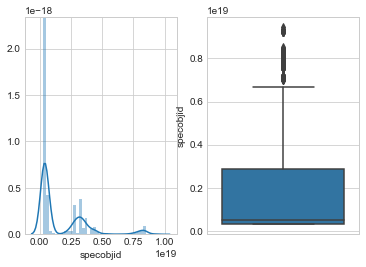

In [6]:
plt.subplot(1,2,1)
sns.distplot(df['specobjid'])

plt.subplot(1,2,2)
sns.boxplot(df['specobjid'], orient = 'v')

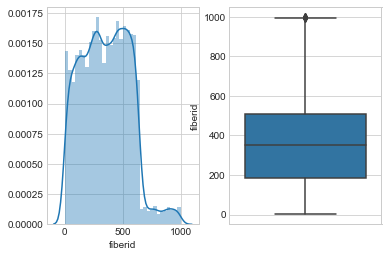

In [7]:
plt.subplot(1,2,1)
sns.distplot(df['fiberid'])

plt.subplot(1,2,2)
sns.boxplot(df['fiberid'], orient = 'v')

In [8]:
#dropping columns rerun,objid 
df = df.drop(['rerun','objid'], axis = 1)

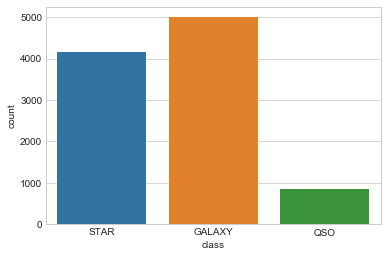

In [9]:
sns.countplot(df['class'])

There are lot of columns which are highly correlated and needs to be resolved inorder to avoid multicolinearity

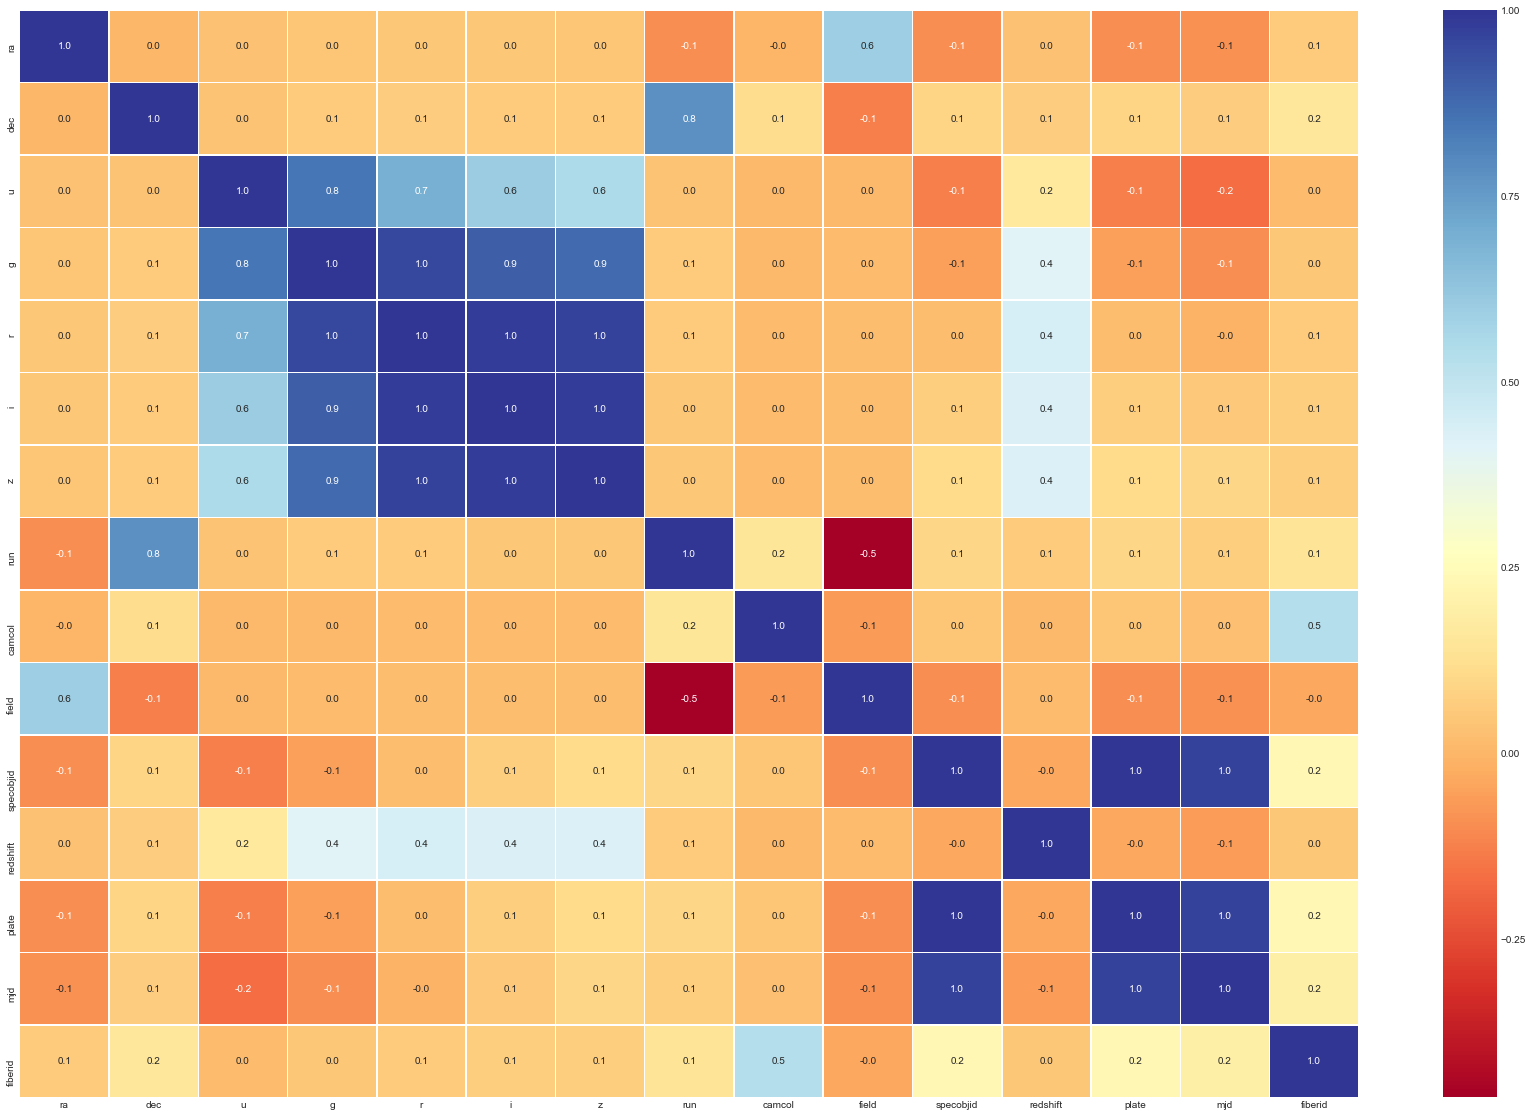

In [10]:
plt.figure(figsize=(30,20)) 
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',cmap = 'RdYlBu')

PCA

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['class'] = le.fit_transform(df['class'])

In [12]:
# independant variables
X = df.drop(['class'], axis=1)
# the dependent variable
Y = df['class']

In [13]:
#scaling in order to fit
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0.167458,-0.584923,1.031486,-0.348559,-0.837280,-0.946058,-0.995342,-0.838061,0.210852,-0.217630,1.031501,-0.369731,1.031489,1.309311,0.668632
1,0.168862,-0.583114,0.052430,-0.166533,-0.154155,-0.082645,-0.026043,-0.838061,0.210852,-0.217630,-0.636183,-0.369849,-0.636213,-0.879197,0.911012
2,0.170574,-0.583475,0.921568,0.867093,0.593154,0.441201,0.314528,-0.838061,0.210852,-0.211479,-0.656313,-0.053027,-0.656339,-0.609191,0.775279
3,0.174558,-0.586501,-1.030630,-0.813627,-0.636692,-0.526604,-0.430921,-0.838061,0.210852,-0.205328,1.031506,-0.369993,1.031489,1.309311,0.760736
4,0.174825,-0.584412,-1.290232,-1.172519,-0.376762,-0.025101,0.158276,-0.838061,0.210852,-0.205328,1.031506,-0.368189,1.031489,1.309311,0.770431


In [14]:
#applying pca
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(XScaled)

PCA(n_components=15)

In [15]:
#variance explained by eigen vectors
print(pca.explained_variance_ratio_)

[3.06757164e-01 2.12582198e-01 1.35790378e-01 1.02417950e-01
 8.30683572e-02 5.81675006e-02 3.06292845e-02 2.91816092e-02
 2.77861880e-02 8.09504581e-03 2.80132559e-03 1.29056295e-03
 1.04500580e-03 3.87429961e-04 2.41097217e-14]


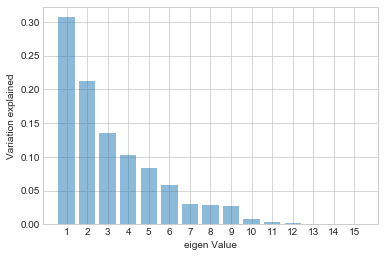

In [16]:
plt.bar(list(range(1,16)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.xticks(np.arange(1,16,1))
plt.show()

only 9 vectors are enough in order to capture 99% of the variance

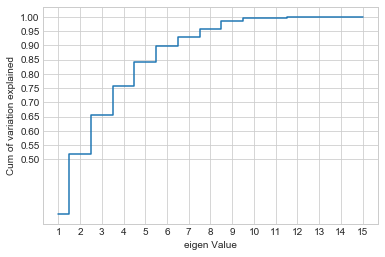

In [17]:
plt.step(list(range(1,16)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.yticks(np.arange(0.5,1.05,0.05))
plt.xticks(np.arange(1,16,1))
plt.show()


Dimensionality reduction

In [18]:
#fitting and transforming a pca with 9 pricipal components
pca9 = PCA(n_components=9)
pca9.fit(XScaled)

print(pca9.explained_variance_ratio_)
Xpca9 = pca9.transform(XScaled)

[0.30675716 0.2125822  0.13579038 0.10241795 0.08306836 0.0581675
 0.03062928 0.02918161 0.02778619]


In [19]:
Xpca9 = pd.DataFrame(Xpca9)
Xpca9.head()

,0,1,2,3,4,5,6,7,8
0,1.158585,1.580231,1.059144,-0.212335,-0.775249,-0.801125,-1.507310,-0.436522,0.616380
1,0.289570,-1.140696,0.127755,-0.523261,-1.132991,-0.206340,-0.182203,0.732209,-0.145376
2,-1.280438,-1.160926,0.236499,-0.349019,-1.137074,-0.456198,-0.495905,0.424871,0.034589
3,1.558494,1.864676,1.174055,-0.314323,-0.680125,0.226703,0.069748,0.484717,0.088100
4,1.206669,1.955424,1.248927,-0.299392,-0.663665,0.430612,0.651651,0.795137,-0.091728


There is no correlation between the variables of the xpca10

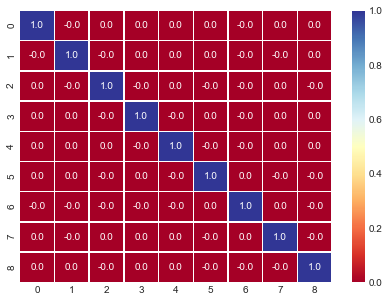

In [20]:
plt.figure(figsize=(7,5)) 
sns.heatmap(Xpca9.corr(), annot=True, linewidths=.5, fmt= '.1f',cmap = 'RdYlBu')

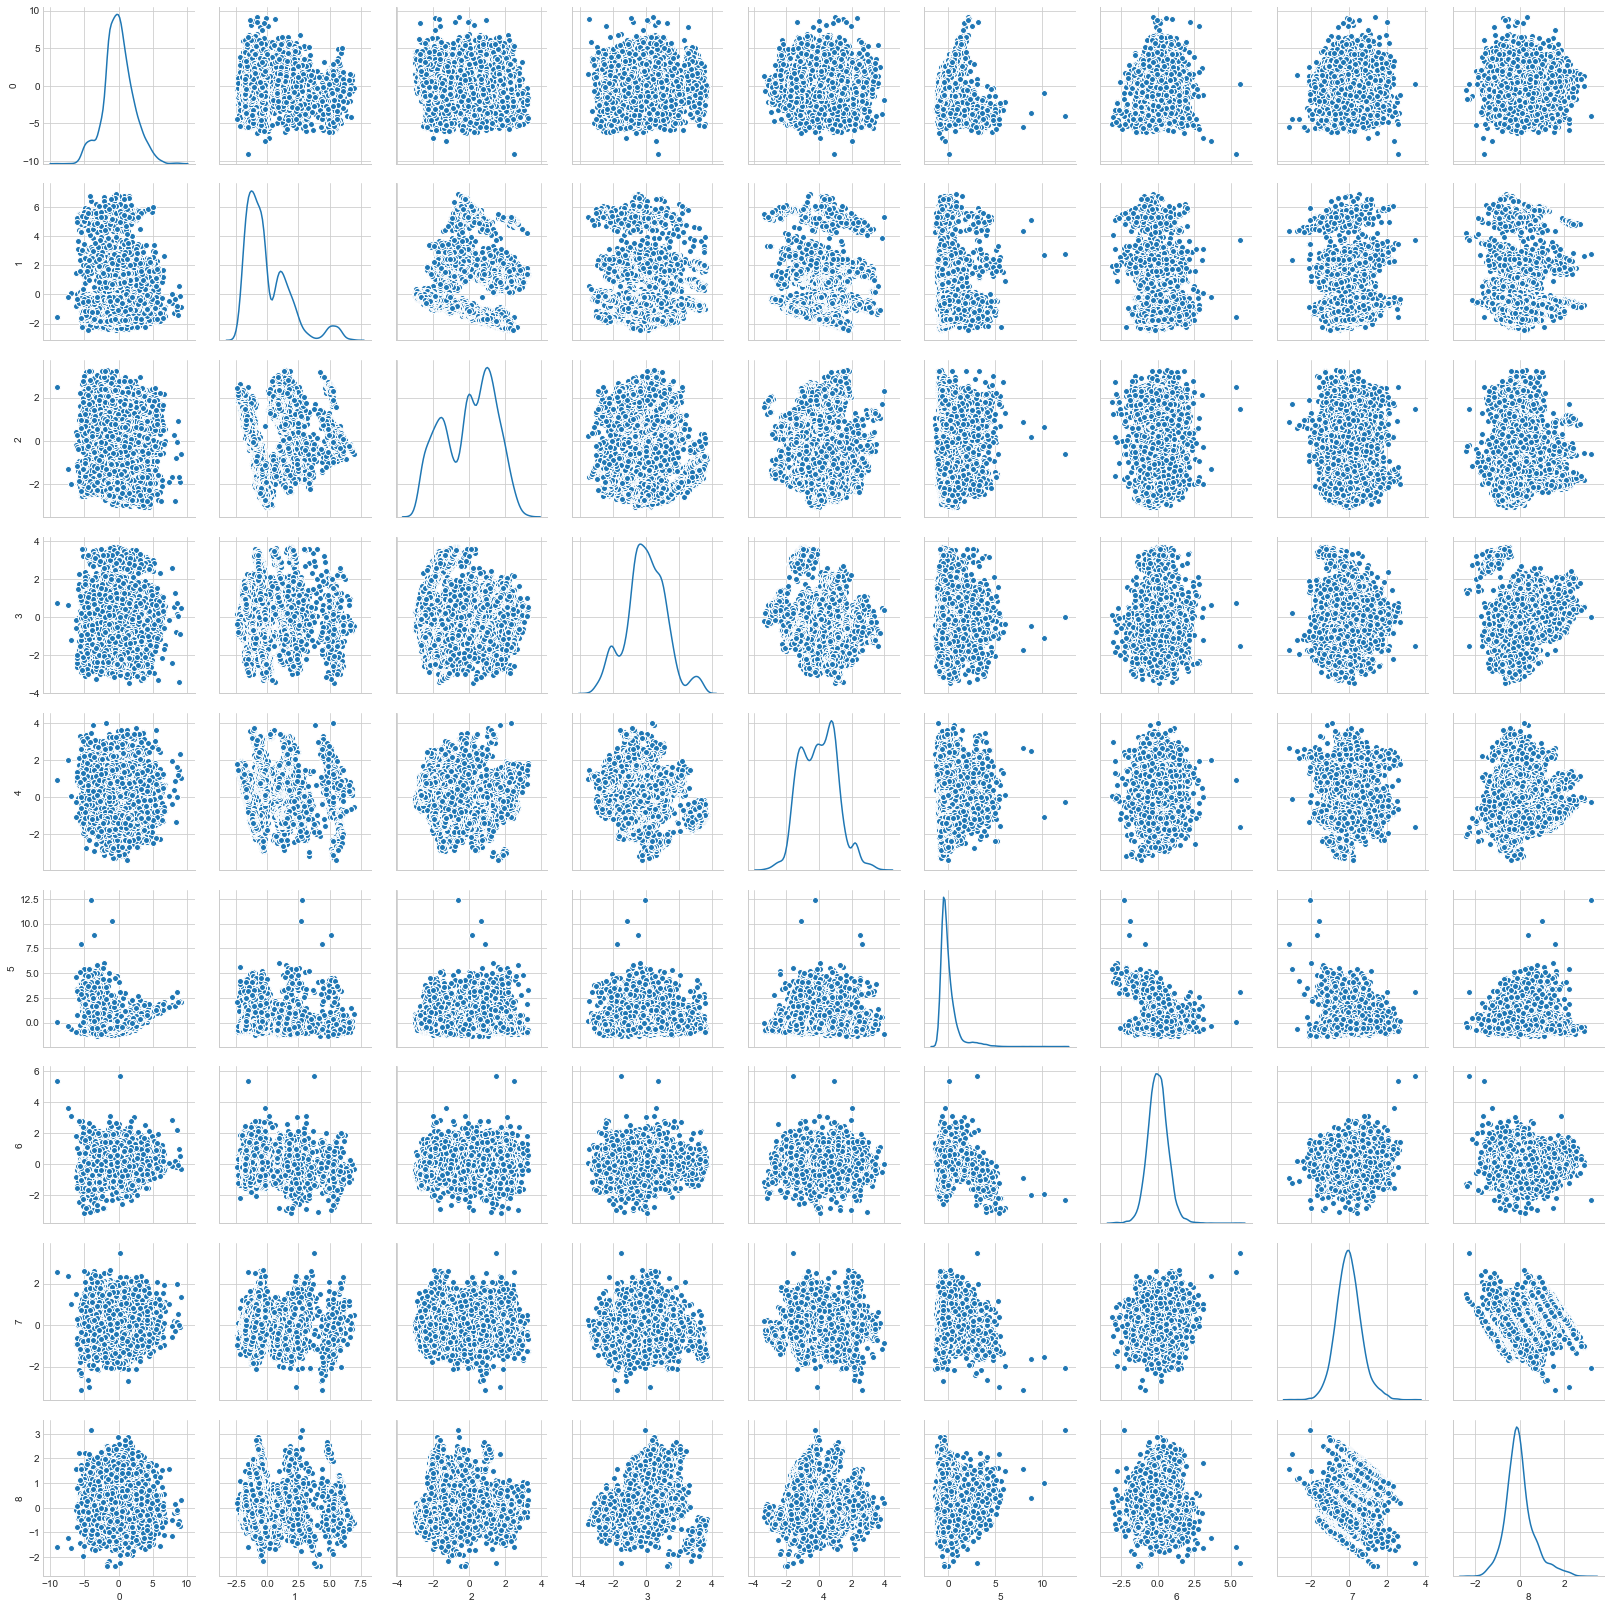

In [21]:
sns.pairplot(Xpca9, diag_kind='kde')

Model building

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xpca9, Y, test_size=0.3, random_state=1,stratify = Y)

C:\Users\puneeth\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


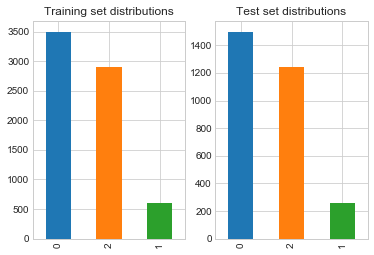

In [23]:
plt.subplot(1,2,1)
y_train.value_counts().plot(kind = 'bar')
plt.subplot(1,2,1).title.set_text('Training set distributions')

plt.subplot(1,2,2)
y_test.value_counts().plot(kind = 'bar')
plt.subplot(1,2,2).title.set_text('Test set distributions')

plt.show()

Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=100)

model_lr.fit(x_train, y_train)

y_predict_lr= model_lr.predict(x_test)


Accuracy of Logistic regression model is 97.39999999999999%


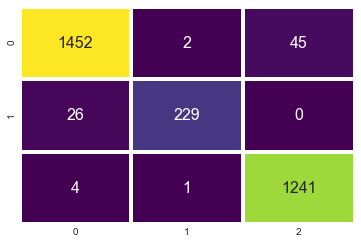

In [25]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm_lr = metrics.confusion_matrix(y_test, y_predict_lr,labels=[0,1,2])
sns.heatmap(cm_lr, annot= True, yticklabels = [0,1], xticklabels = [0,1,2], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g',cbar = False)

print("")

print("Accuracy of Logistic regression model is {}%".format(accuracy_score(y_test, y_predict_lr)*100))

K-Nearest Neighbours

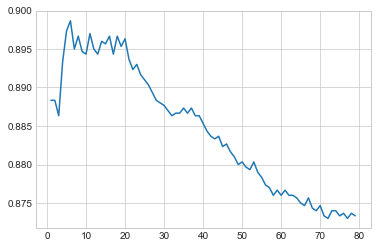

In [26]:
#checking what value of 'K' gives the highest accuracy on the testing dataset
from sklearn.neighbors import KNeighborsClassifier
scores =[]
for k in range(1,80):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

plt.plot(range(1,80),scores)


In [27]:
model_KNN = KNeighborsClassifier(n_neighbors =6)

model_KNN.fit(x_train, y_train)

y_predict_KNN= model_KNN.predict(x_test)

Accuracy of K-Nearest Neighbours model is 89.43333333333334%


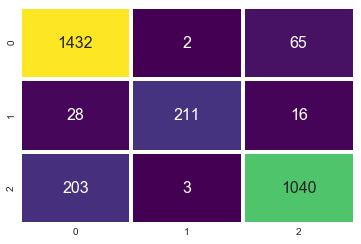

In [28]:
cm_knn = metrics.confusion_matrix(y_test, y_predict_KNN,labels=[0,1,2])
sns.heatmap(cm_knn, annot= True, yticklabels = [0,1,2], xticklabels = [0,1,2], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g',cbar = False)


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_KNN)*100))

SVM

In [30]:
from sklearn.svm import SVC

model_SVM = SVC(kernel= 'linear',C= 0.1 , gamma = 1000 ,probability = True)

model_SVM.fit(x_train, y_train)

y_predict_SVM= model_SVM.predict(x_test)

Accuracy of K-Nearest Neighbours model is 96.73333333333333%


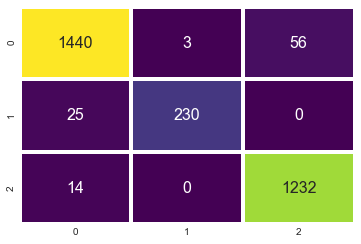

In [31]:
cm_svm = metrics.confusion_matrix(y_test, y_predict_SVM,labels=[0,1,2])
sns.heatmap(cm_svm, annot= True, yticklabels = [0,1,2], xticklabels = [0,1,2], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g',cbar = False)


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_SVM)*100))

Decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

param_grid_dt = {'max_features': list(range(1,8)) , 'max_depth':list(range(2,7))}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(model_dt,param_grid_dt,cv=5)

gs.fit(x_train, y_train)

gs.best_params_

{'max_depth': 5, 'max_features': 7}

In [33]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=5, max_features= 7)

model_dt.fit(x_train, y_train)

y_predict_dt= model_dt.predict(x_test)

Accuracy of K-Nearest Neighbours model is 89.53333333333333%


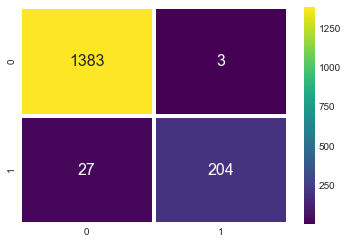

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


cm_dt = metrics.confusion_matrix(y_test, y_predict_dt,labels=[0,1])
sns.heatmap(cm_dt, annot= True, yticklabels = [0,1], xticklabels = [0,1], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_dt)*100))

Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier


model_rfcl = RandomForestClassifier()

param_grid_rfcl = {'max_depth': list(range(2,8)) , 'n_estimators':[50,100,150,250]}

from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(model_rfcl,param_grid_rfcl,cv=5)

gs.fit(x_train, y_train)

gs.best_params_

{'max_depth': 7, 'n_estimators': 250}

In [36]:
from sklearn.ensemble import RandomForestClassifier

model_rfcl = RandomForestClassifier(max_depth=7, n_estimators= 250)

model_rfcl.fit(x_train, y_train)

y_predict_rfcl= model_rfcl.predict(x_test)

Accuracy of K-Nearest Neighbours model is 91.03333333333333%


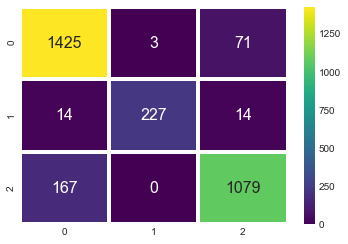

In [37]:
cm_rfcl = metrics.confusion_matrix(y_test, y_predict_rfcl,labels=[0,1,2])
sns.heatmap(cm_rfcl, annot= True, yticklabels = [0,1,2], xticklabels = [0,1,2], cmap = 'viridis',annot_kws={"size": 16},linewidths= 3,fmt='g')


print("Accuracy of K-Nearest Neighbours model is {}%".format(accuracy_score(y_test, y_predict_rfcl)*100))

Logistic regression turned to be the best classifier with 97.3%accuracy